The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8458 - loss: 0.4989 - val_accuracy: 0.9519 - val_loss: 0.1603
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9566 - loss: 0.1428 - val_accuracy: 0.9665 - val_loss: 0.1090
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.9724 - loss: 0.0927 - val_accuracy: 0.9703 - val_loss: 0.0952
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9737 - val_loss: 0.0839
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9765 - val_loss: 0.0733
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9898 - loss: 0.0350 - val_accuracy: 0.9761 - val_loss: 0.0721
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9920 - loss: 0.0283 - val_accuracy:

Reusing TensorBoard on port 6007 (pid 75979), started 19:34:26 ago. (Use '!kill 75979' to kill it.)

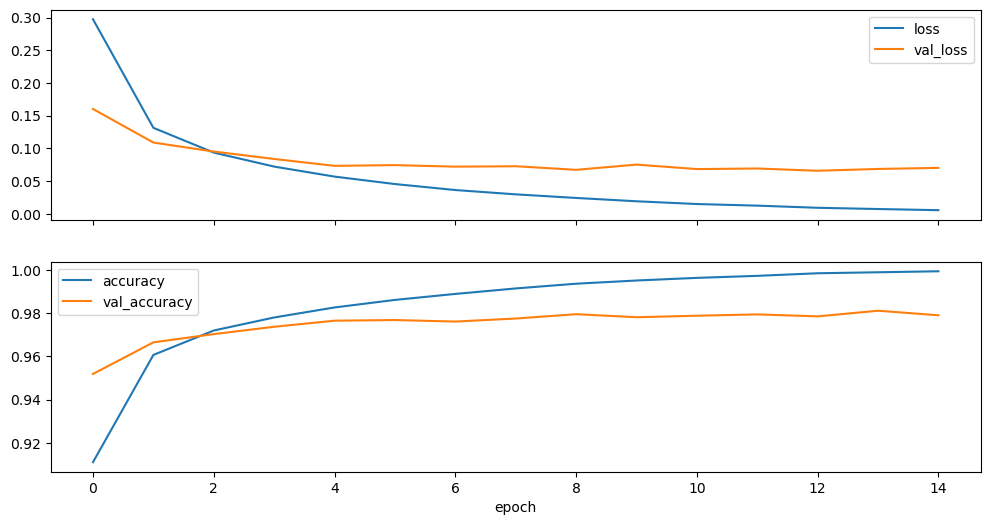

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

digits = mnist.load_data(path="mnist.npz")

(X_train, y_train), (X_test, y_test) = digits

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

%load_ext tensorboard
!rm -rf tensorboard_logs
import datetime
from tensorflow.keras.callbacks import TensorBoard

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)



model = Sequential()
model.add(Dense(100, input_shape=(784,), activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.05, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, validation_data=(X_test, y_test), batch_size = 128, epochs = 15, callbacks=[tensorboard_callback])

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1)

%tensorboard --logdir tensorboard_logs